# Homework 4 Solution

# Question 1

(1) 
- This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size.
-  The first fold is treated as a validation set, and the method is fit on the remaining $k−1$ folds
-  The mean squared error, $MSE_1$, is then computed on the observations in the held-out fold
- This procedure is repeated $k$ times; each time, a different group of observations is treated as a validation set
- This process results in $k$ estimates of the test error, $MSE_1, MSE_2,..., MSE_k$
- The k-fold CV estimate is computed by averaging these values:
$$\text{CV}_{(k)}=\frac{1}{k}\sum_{i=1}^{k}MSE_i$$

(2)

The validation set has a clear computational advantage. However, the resulting test error estimates will be highly variable. It is not hard to see that LOOCV will give approximately unbiased estimates of the test error but has a higher variance, so that k-fold CV will give more accurate estimates.

## Question 2

It usually indicates the situation where you’d have more features than observations. I want you to think about why it might be a problem. You can raise the questions regarding the following:
1.	Resource intensive: computation problems
2.	Overfitting: generalization problems

## Question 3

    The main motivations for dimensionality reduction are:
    - To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)
    - To visualize the data and gain insights on the most important features
    - To save space (compression)
    
    The main drawbacks are:
    - Some information is lost, possibly degrading the performance of subsequent training algorithms.
    - It can be computationally intensive.
    - It adds some complexity to your Machine Learning pipelines.
    - Transformed features are often hard to interpret.

## Question 4

 Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.

# Question 5

In [1]:
import numpy as np
np.random.seed(1)
x = np.random.normal(0,1,100)
y = x - 2 * x ** 2 + np.random.normal(0,1,100)

### (2)

In [5]:
import matplotlib.pyplot as plt

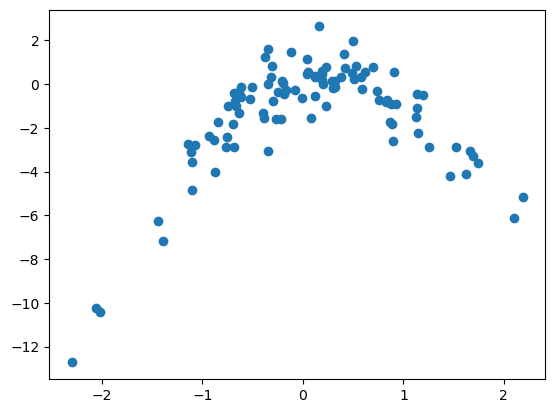

In [7]:
plt.scatter(x,y)
plt.show()

It looks like a non-linear relationship between $y$ and $x$.

### (3)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [9]:
poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)

In [21]:
x_poly = poly.fit_transform(pd.DataFrame(x))
X = pd.DataFrame(x_poly)

In [20]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
cv = LeaveOneOut()

In [23]:
mse = []
lr = LinearRegression()
for i in range(4):
    scores = cross_val_score(lr, X = X.iloc[:,:i+1],y = y, scoring='neg_mean_squared_error', cv = cv, n_jobs= -1)
    mse.append(np.mean(np.absolute(scores)))

In [24]:
mse

[6.260764331604616, 0.9142897072803661, 0.926876878164881, 0.8669116865881082]

In [25]:
mse = pd.DataFrame(mse)
mse = mse.reset_index()
mse[['index']] += 1

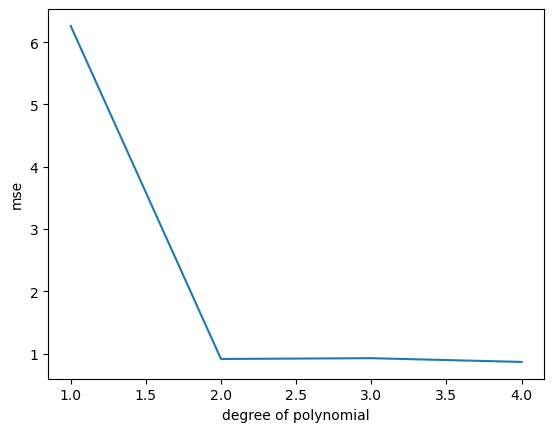

In [29]:
import copy

mse1 = copy.copy(mse)
mse1.plot(x = 'index', y = 0, legend = None)
plt.xlabel('degree of polynomial')
plt.ylabel('mse')
plt.show()

### (4)

In [31]:
np.random.seed(100)
x = np.random.normal(0,1,100)
y = x - 2 * x ** 2 + np.random.normal(0,1,100)

x_poly = poly.fit_transform(pd.DataFrame(x))
X = pd.DataFrame(x_poly)

mse = []
for i in range(4):
    scores = cross_val_score(lr, X = X.iloc[:,:i+1],y = y, scoring='neg_mean_squared_error', cv = cv, n_jobs= -1)
    mse.append(np.mean(np.absolute(scores)))

mse = pd.DataFrame(mse)
mse = mse.reset_index()
mse[['index']] += 1

mse2 = copy.copy(mse)

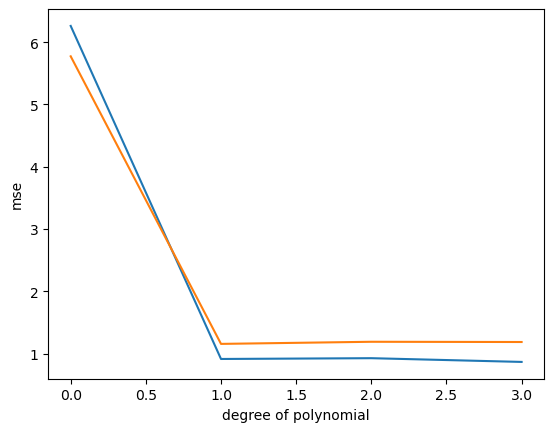

In [37]:
plt.plot(mse1.index, mse1[[0]])
plt.plot(mse2.index, mse2[[0]])
plt.xlabel('degree of polynomial')
plt.ylabel('mse')
plt.show()

Note that we use a different random seed. So two data sets are different data. As a result, the resulting mses are somewhat different.

### (5)

In [41]:
mse1

,index,0
0,1,6.260764
1,2,0.914290
2,3,0.926877
3,4,0.866912


In [42]:
mse2

,index,0
0,1,5.772817
1,2,1.156388
2,3,1.190355
3,4,1.186571


Note that model (a) shows the lowest fit (the highest error). For the higher polynomials, it is hard to conclude. 

# Question 6

In [71]:
df = pd.read_csv('https://www.statlearning.com/s/College.csv')

In [72]:
# See whether colleges are unique
len(set(df.iloc[:,0]))

777

In [73]:
df = pd.read_csv('https://www.statlearning.com/s/College.csv', index_col=0)

In [74]:
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [75]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [76]:
df['Private'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [86]:
X = df[['Private', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 
     'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate']]
y = df.Apps

The pre preprocess is done.

### (1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state= 12)

In [89]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_pred,y_test))

1456051.3323890513


### (2)

In [174]:
# Multiple ways

In [142]:
from sklearn.linear_model import RidgeCV
alphas = np.linspace(0.0001,50,1000)
ridge_cv=RidgeCV(alphas=alphas, cv = 3)
ridge_mod = ridge_cv.fit(X, y)
print(ridge_mod.alpha_)

16.066133933933934


In [175]:
from sklearn.model_selection import GridSearchCV
alpha_range = np.linspace(0.0001,50,1000)
ridge = Ridge()
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(ridge, param_grid, cv=3)
grid_search.fit(X, y)
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation score:", grid_search.best_score_)

Best alpha: 16.066133933933934
Best cross-validation score: 0.9010078092605291


In [185]:
# Fit a Ridge regression model with the best value of alpha
ridge = Ridge(alpha=grid_search.best_params_['alpha'])

### (3)

In [143]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas= alphas, cv = 3)
lasso_mod = lasso_cv.fit(X, y)
print(lasso_mod.alpha_)

4.704795295295295


In [184]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alpha_range = np.linspace(0.0001,50,1000)
param_grid = {'alpha': alpha_range}

# Use GridSearchCV to perform k-fold cross-validation and select the best value of alpha
grid_search = GridSearchCV(lasso, param_grid, cv=3)
grid_search.fit(X, y)

# Print the best value of alpha and the corresponding mean cross-validation score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation score:", grid_search.best_score_)

# Fit a Lasso regression model with the best value of alpha
lasso = Lasso(alpha=grid_search.best_params_['alpha'])

Best alpha: 4.804895195195195
Best cross-validation score: 0.9009049824666948


### (4) Impress me :)